In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  
import pandas as pd
import info

# path = f'../results/{info.task}/{info.user}/take_03/learning_progress.tsv'
# print(path)
# df = pd.read_csv(path, sep='\t')
df = pd.read_csv('C:/Users/Hammock/Documents/VU_masters_AI/learning_machines/learning_machines_robobo/results/obstacle_avoidance/et/take_03/learning_progress.tsv', sep='\t')

In [42]:
# rename index col
df = df.rename(columns={'Unnamed: 0': 'index'})
df.head()

,index,accu_reward,accu_v_measure_sensor_distance,action_index,episode_index,epsilon,object_in_range,observations:,reward,v_distance_reward,v_measure_calc_distance,v_measure_sensor_distance
0,0,0.103356,1.164448,1.0,0.0,1.000000,1.0,"[0.15, 0.15, 0.15, 0.1388246311195053]",0.103356,0.014557,0.0,1.164448
1,1,0.138400,2.448357,1.0,0.0,0.996004,1.0,"[0.15, 0.15, 0.15, 0.12148890298626241]",0.035044,0.015659,0.0,1.283909
2,2,2.714778,4.048357,0.0,0.0,0.992008,0.0,"[0.15, 0.15, 0.15, 0.15]",2.576379,0.061234,3.0,1.600000
3,3,2.855319,5.648357,1.0,0.0,0.988012,0.0,"[0.15, 0.15, 0.15, 0.15]",0.140541,0.013524,3.0,1.600000
4,4,2.995000,7.248357,2.0,0.0,0.984016,0.0,"[0.15, 0.15, 0.15, 0.15]",0.139681,0.012664,3.0,1.600000


30.21394742781168
-327.81782125614507
-372.1815828925095
-362.56608884591066
-392.69456068539023
-415.12273425018
-487.3624605687715
-503.04811067181265
-562.2192848216705
-561.6597701782241
-551.5729848521069
-504.5010829951766
-505.5298370238711
-506.2421350545321
-558.1575984377274
-470.73473877984827
-385.8692266159874


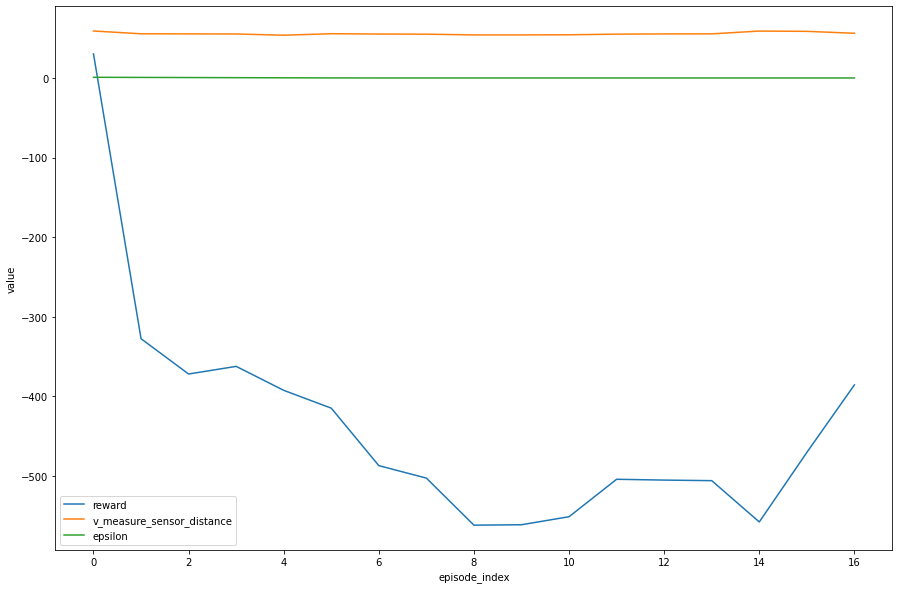

In [55]:

# group per episode and append to new df
_df = pd.DataFrame()
for k,v in df.groupby('episode_index'):
    _df = _df.append({'episode_index': int(k), 'reward': v['reward'].sum(), 'v_measure_sensor_distance': v['v_measure_sensor_distance'].sum(), 'epsilon': v['epsilon'].min()}, ignore_index=True)
    print(v['reward'].sum())

    
# plot 
fig, ax = plt.subplots(figsize=(15,10))
melt = _df.melt(id_vars='episode_index', value_vars=['reward', 'v_measure_sensor_distance', 'epsilon'])
sns.lineplot(data=melt, x='episode_index', y='value', hue='variable')
plt.legend()
plt.savefig('../img/learning_rate_lineplot.png')

In [47]:
_df

,accu_reward,accu_v_measure_sensor_distance,episode_index
0,403.586268,1212.792605,0.0
1,-5897.625834,1141.915731,1.0
2,-8344.910633,1138.451868,2.0
3,-7481.274238,1124.805056,3.0
4,-8252.294827,1105.254711,4.0
5,-9099.110565,1127.072555,5.0
6,-9758.183325,1133.272349,6.0
7,-10316.610023,1128.149263,7.0
8,-11545.342912,1109.338342,8.0
9,-11514.390322,1109.297070,9.0


In [ ]:
    
# plot 
fig, ax = plt.subplots(figsize=(15,10))
# melt = _df.melt(id_vars='episode_index', value_vars=['accu_reward', 'accu_v_measure_sensor_distance'])
sns.barplot(data=melt, x='episode_index', y='value', hue='variable')
plt.legend()
plt.savefig('../img/learning_rate_barplot.png')

In [ ]:
x = str(0.22)+'.model'
x